Hunter Bennett | Glass Lab | Kupffer Strains Project | 12 Feb 2021  

In [2]:
### header ###
__author__ = "Hunter Bennett"
__license__ = "BSD"
__email__ = "hunter.r.bennett@gmail.com"
%load_ext autoreload
%autoreload 2
### imports ###
import sys
%matplotlib inline
import os
import re
import glob
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt 
import seaborn as sns
matplotlib.rcParams['savefig.dpi'] = 200
sns.set(font_scale=1)
sns.set_context('talk')
sns.set_style('white')

# import custom functions
import sys
sys.path.insert(0, '/home/h1bennet/code/')
from hbUtils import ngs_qc, quantile_normalize_df

Set working directory

In [3]:
dataDirectory = '/data/mm10/Brain_MPSIIIA/ATAC/Microglia/'
workingDirectory = '/home/h1bennet/brain_aging/results/00_Microglia_ATAC/'
if not os.path.isdir(workingDirectory):
    os.mkdir(workingDirectory)
os.chdir(workingDirectory)

# Quality control

In [4]:
qc = ngs_qc(dataDirectory, 'atac')

/data/mm10/Brain_MPSIIIA/ATAC/Microglia//
./Microglia_qc/


<Figure size 432x288 with 0 Axes>

In [5]:
qc

,uniquePositions,fragmentLengthEstimate,tagsPerBP,clonality,GC_Content,totalReads,uniquelyMappedReads,multiMappedReads,unmappedReads,uniquelyMappedFraction,mappedFraction
00_mouse_Bl6_WT_F_4months_Microglia_ATAC_1_JOS_AGGCAGAA,7802983.0,46.0,0.004245,1.483,-1.0,13667956.0,11446776.0,1862374.0,358806.0,0.837490,0.973748
00_mouse_Bl6_WT_F_4months_Microglia_ATAC_2_JOS_GGACTCCT,8364863.0,46.0,0.004331,1.411,-1.0,14180457.0,11554960.0,2162273.0,463224.0,0.814851,0.967334
00_mouse_Bl6_WT_M_14wks_Microglia_ATAC_1_JOS_GAGGGGTT,6768213.0,68.0,0.003863,1.556,-1.0,17759943.0,11823968.0,4816476.0,1119499.0,0.665766,0.936965
00_mouse_Sall1WTEnhancer_M_Microglia_ATAC_rep3_BF_l20200128_AAGGAACG,6692622.0,67.0,0.004299,1.751,-1.0,15302523.0,12404844.0,2602378.0,295301.0,0.810640,0.980702
00_mouse_Sall1WTEnhancer_M_Microglia_ATAC_rep4_BF_l20200128_CCAACTCG,6531985.0,56.0,0.004238,1.768,-1.0,14903732.0,12078971.0,2365959.0,458802.0,0.810466,0.969216
01_mouse_Bl6_WT_F_25months_Microglia_ATAC_1_JOS_CCGTTTGT,7508898.0,67.0,0.004722,1.714,-1.0,19591146.0,14653959.0,4513522.0,423665.0,0.747989,0.978375
01_mouse_Bl6_WT_M_24months_Microglia_ATAC_1_JOS_TAAGGCGA,8448723.0,56.0,0.005677,1.831,-1.0,22588240.0,17406689.0,4788906.0,392645.0,0.770608,0.982617
01_mouse_Bl6_WT_M_24months_Microglia_ATAC_2_JOS_CTCTCTAC,4476002.0,56.0,0.002305,1.403,-1.0,8727064.0,6796042.0,1772624.0,158398.0,0.778732,0.981850
01_mouse_Bl6_WT_M_25months_Microglia_ATAC_1_AL_CGATATCA,6311984.0,46.0,0.003752,1.620,-1.0,12224167.0,10446396.0,1470219.0,307552.0,0.854569,0.974841
01_mouse_Bl6_WT_M_25months_Microglia_ATAC_1_JOS_TGCTGGGT,9278508.0,56.0,0.004855,1.426,-1.0,21416419.0,14577639.0,6120973.0,717807.0,0.680676,0.966483


### Plot tag count distribution

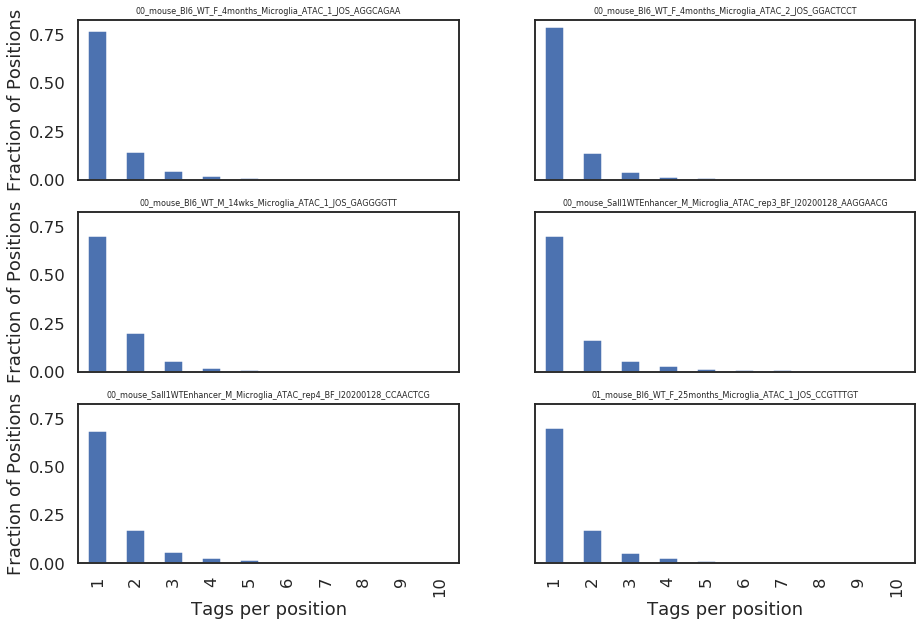

In [6]:
tds = glob.glob(dataDirectory+'/*')
tds = np.sort(tds)

fig, axs = plt.subplots(3,2, figsize=(15, 10), sharex=True, sharey=True)

for ax, td in zip(axs.flatten(), tds):
    df = pd.read_csv(td+'/tagCountDistribution.txt', sep='\t', index_col=0)
    df.loc[1:10, :].plot.bar(ax=ax, legend=False)
    ax.set_xlabel('Tags per position')
    ax.set_ylabel('Fraction of Positions')
    ax.set_title(td.split('/')[-1].split('_AL')[0], fontsize=8)

### make browser hub (run on command line for now)

|Colors:|      |
|------|------|
|AJ:| 228,26,28|  
|Balb:| 55,126,184| 
|C57:| 77,175,74|



In [7]:
%%bash

makeMultiWigHub.pl hrb_strains_atac_amln_30weeks mm10 -force -gradient \
158,202,225, 8,81,156 \
-d /home/h1bennet/brain_aging/results/00_Microglia_ATAC/*

SyntaxError: invalid syntax (<ipython-input-7-45e2a747b012>, line 1)

# Call Peaks

In [7]:
%%bash
# delete the existing script file
rm ./peakCalling_homer.sh
# create a script file
touch ./peakCalling_homer.sh

# if directories don't exist, create them
if [ ! -d ./atac_peak_files_qc/ ]; then mkdir ./atac_peak_files_qc; fi

rm: cannot remove ‘./peakCalling_homer.sh’: No such file or directory


In [8]:
with open('./peakCalling_homer.sh', 'w') as f:
    for tagdir in os.listdir(dataDirectory):
        find_peaks_idr = ['findPeaks', dataDirectory + '/' + tagdir,
                          '-L', '0', '-C', '0', '-fdr', '0.9', '-style',
                          'factor', '-size', '200', '>',
                          workingDirectory + '/atac_peak_files_qc/' + tagdir + '_peaks.tsv',
                          '&', '\n']
        find_peaks = ['findPeaks', dataDirectory + '/' + tagdir,
                      '-style', 'factor', '-size', '200', '>',
                      workingDirectory + '/atac_peak_files_qc/' + tagdir + '_default_peaks.tsv',
                      '&', '\n']
        # write commands to file
        f.write(' '.join(find_peaks_idr))
        f.write(' '.join(find_peaks))
f.close()

### compile peak stats for QC

In [9]:
peak_stats={}

for td in os.listdir('./atac_peak_files/'):

    peak_dict = {'total_peaks': 0,
                 'ip_eff': 0.0,
                 'peaks_filt_input': 0,
                 'peaks_filt_local': 0,
                 'peaks_filt_clonal':0}

    with open('./atac_peak_files/'+td, 'r') as f:
        for line in f.readlines():
            if "total peaks" in line:
                peak_dict['total_peaks'] = int(line.split(' = ')[-1])
            if "Approximate IP efficiency" in line:
                peak_dict['ip_eff'] = float(line.replace('%\n', '').split(' = ')[-1])
            if "Putative peaks filtered by input" in line:
                peak_dict['peaks_filt_input'] = int(line.split(' = ')[-1])
            if "Putative peaks filtered by local signal" in line:
                peak_dict['peaks_filt_local'] = int(line.split(' = ')[-1])
            if "Putative peaks filtered for being too clonal" in line:
                peak_dict['peaks_filt_clonal'] = int(line.split(' = ')[-1])
                
    peak_stats[td] = peak_dict
            
df = pd.DataFrame(peak_stats).T

In [10]:
df.sort_index(inplace=True)

### Save to file

In [11]:
df.loc[df.index.str.contains('default'), :].to_csv('./default_peak_table.txt', sep='\t')
df.loc[~df.index.str.contains('default'), :].to_csv('./idr_peak_table.txt', sep='\t')